## Machine Learning for Scheme of Square Prediction

### Reading database (DB) and Printing the information out...

In [3]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np
import random

# Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from pathlib import Path

# Statistical and machine learning models
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

# Other libraries
#import shap
from scipy.stats import pearsonr
from rdkit import Chem

data = pd.read_csv("data_mingap.csv")
data

dienophile    diene  ΔG TS_endo_1  ΔG TS_endo_2  ΔG TS_exo_1  ΔG TS_exo_2  \
0          4_6  5_2_2_5        91.480        85.946       85.848       93.129   
1          4_9  5_2_2_3        68.077        69.465       68.492       69.729   
2          5_5  3_2_2_1        90.996        90.996       80.073       80.073   
3          3_7  5_2_2_2        83.285        78.464       78.559       77.336   
4          4_5  1_2_2_5        85.740        89.821       75.982       82.604   
..         ...      ...           ...           ...          ...          ...   
995        6_6  1_1_6_6        28.771        28.771       28.771       28.771   
996        6_8  1_4_3_1        31.484        32.090       31.444       32.645   
997        1_1  1_4_6_4        36.806        36.806       37.657       37.657   
998        1_6  1_3_3_1        35.763        35.763       36.318       36.318   
999        1_1  1_1_2_6        36.010        36.010       36.468       36.468   

     ΔG Product_endo_1  ΔG Product_endo_2  ΔG Product_exo_1  ΔG Product_exo_2  \
0               34.443             36.077            37.005            42.563   
1               22.931             23.261            13.035            37.555   
2               15.623             15.623            34.097            34.097   
3               31.327             26.402            28.950            33.326   
4               21.850             36.654            28.529            32.531   
..                 ...                ...               ...               ...   
995            -36.183            -36.183           -36.184           -36.184   
996            -34.959            -31.490           -36.773           -36.524   
997            -33.969            -33.969           -36.952           -36.952   
998            -36.830            -36.830           -37.763           -37.763   
999            -31.176            -31.176           -38.172           -38.172   

     ...  LUMO_D - HOMO_dPh  LUMO_dPh - HOMO_D  Min(TS_1)  Min(TS_2)  \
0    ...              9.788              9.022     85.848     85.946   
1    ...             10.132              6.616     68.077     69.465   
2    ...              9.381              8.683     80.073     80.073   
3    ...              6.752              8.074     78.559     77.336   
4    ...              9.187              9.372     75.982     82.604   
..   ...                ...                ...        ...        ...   
995  ...              8.432              9.581     28.771     28.771   
996  ...              9.767              7.670     31.444     32.090   
997  ...              9.335              9.078     36.806     36.806   
998  ...              9.076              9.822     35.763     35.763   
999  ...              8.351              9.978     36.010     36.010   

     Min_TSـall  Min(TS_1) - Min(TS_2)  Min(Product_1)  Min(Product_2)  \
0        85.848                 -0.098          34.443          36.077   
1        68.077                 -1.388          13.035          23.261   
2        80.073                  0.000          15.623          15.623   
3        77.336                  1.224          28.950          26.402   
4        75.982                 -6.622          21.850          32.531   
..          ...                    ...             ...             ...   
995      28.771                  0.000         -36.184         -36.184   
996      31.444                 -0.646         -36.773         -36.524   
997      36.806                  0.000         -36.952         -36.952   
998      35.763                  0.000         -37.763         -37.763   
999      36.010                  0.000         -38.172         -38.172   

     Min(Product_1) - Min(Product_2)  min_gap  
0                             -1.634    9.022  
1                            -10.226    6.616  
2                              0.000    8.683  
3                              2.548    6.752  
4                            -10.681    9.187  
..              

# scatter_min.png

تعداد داده‌ها: 1000


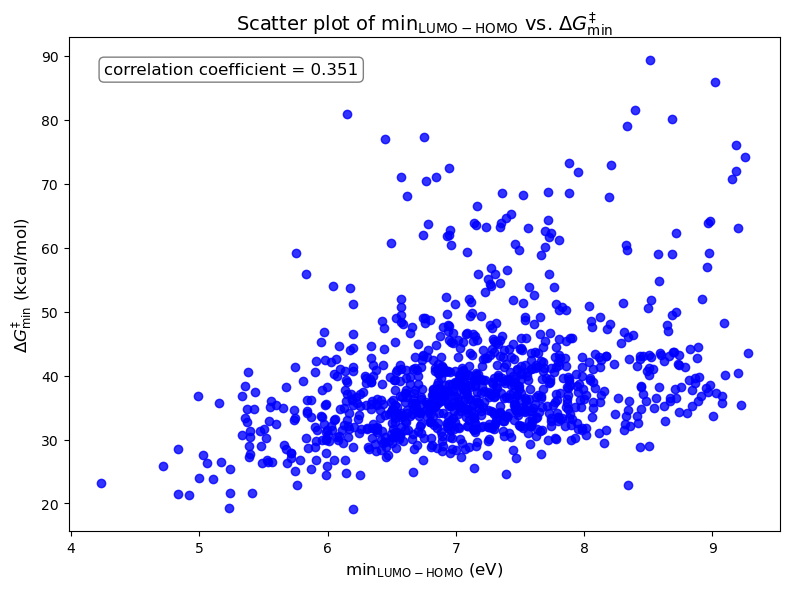

✅ ذخیره موفق: scatter_min.png


In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# اصلاح و پاک‌سازی ستون‌ها
df = df.rename(columns=lambda x: x.strip())
if "Min_TSـall" in df.columns:
    df = df.rename(columns={"Min_TSـall": "Min_TS_all"})

# حذف داده‌های ناقص
df = df.dropna(subset=["min_gap", "Min_TS_all"])

# بررسی تعداد داده‌ها
print("تعداد داده‌ها:", len(df))

# اگر داده‌ای نیست، هشدار بده
if df.empty:
    print("❌ داده‌ای برای رسم موجود نیست!")
else:
    # محاسبه ضریب همبستگی
    corr = df["min_gap"].corr(df["Min_TS_all"])
    corr_text = f"correlation coefficient = {corr:.3f}"

    # رسم
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(df["min_gap"], df["Min_TS_all"], color="blue", alpha=0.8)

    # عنوان و برچسب‌ها
    ax.set_title(r"Scatter plot of $\mathrm{min}_{\mathrm{LUMO} - \mathrm{HOMO}}$ vs. $\Delta G_{\mathrm{min}}^{\ddag}$", fontsize=14)
    ax.set_xlabel(r"$\mathrm{min}_{\mathrm{LUMO} - \mathrm{HOMO}}$ (eV)", fontsize=12)
    ax.set_ylabel(r"$\Delta G_{\mathrm{min}}^{\ddag}$ (kcal/mol)", fontsize=12)

    # نمایش ضریب همبستگی روی شکل
    ax.text(
        0.05, 0.95, corr_text,
        transform=ax.transAxes,
        fontsize=12, color="black",
        ha="left", va="top",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray")
    )

    # حذف grid
    ax.grid(False)

    # ذخیره قبل از نمایش
    plt.tight_layout()
    plt.savefig("scatter_min.png", dpi=300)
    plt.show()
    print("✅ ذخیره موفق: scatter_min.png")


In [10]:
df.to_excel('data.xlsx', index=False, engine='openpyxl')

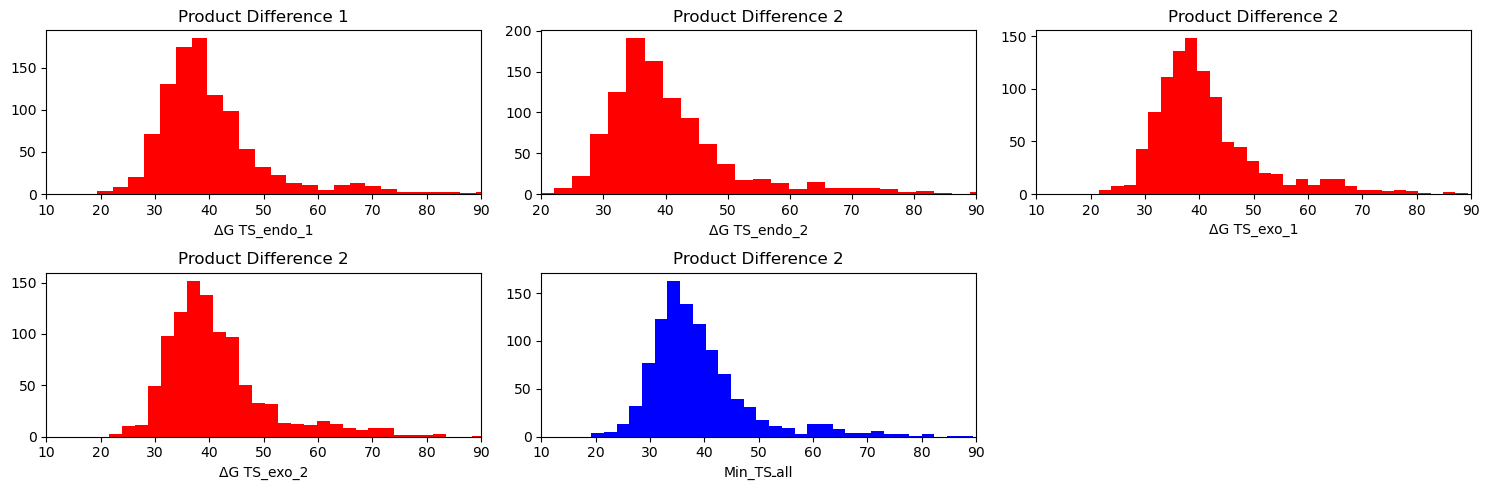

In [11]:
plt.figure(figsize=(15, 5))

# first
plt.subplot(2, 3, 1)
plt.hist(db['ΔG TS_endo_1'], bins=30, color='r')
plt.title('Product Difference 1')
plt.xlim(10, 90)
plt.xlabel('ΔG TS_endo_1')

# second
plt.subplot(2, 3, 2)
plt.hist(db['ΔG TS_endo_2'], bins=30, color='r')
plt.title('Product Difference 2')
plt.xlim(20, 90)
plt.xlabel('ΔG TS_endo_2')

# third
plt.subplot(2, 3, 3)
plt.hist(db['ΔG TS_exo_1'], bins=30, color='r')
plt.title('Product Difference 2')
plt.xlim(10, 90)
plt.xlabel('ΔG TS_exo_1')

# forths
plt.subplot(2, 3, 4)
plt.hist(db['ΔG TS_exo_2'], bins=30, color='r')
plt.title('Product Difference 2')
plt.xlim(10, 90)
plt.xlabel('ΔG TS_exo_2')

# fifths
plt.subplot(2, 3, 5)
plt.hist(db['Min_TSـall'], bins=30, color='b')
plt.title('Product Difference 2')
plt.xlim(10, 90)
plt.xlabel('Min_TSـall')

plt.tight_layout()
plt.show()

In [12]:
df.columns

Index(['dienophile', 'diene', 'ΔG TS_endo_1', 'ΔG TS_endo_2', 'ΔG TS_exo_1',
       'ΔG TS_exo_2', 'ΔG Product_endo_1', 'ΔG Product_endo_2',
       'ΔG Product_exo_1', 'ΔG Product_exo_2', 'pz_pop_C1_D', 'pz_pop_C2_D',
       'pz_pop_C3_D', 'pz_pop_C4_D', 'LUMO_D', 'HOMO_D', 'Sigma p_1_D',
       'Sigma p_4_D', 'Sigma p_2_D', 'Sigma p_3_D', 'NBO_1_D', 'NBO_2_D',
       'NBO_3_D', 'NBO_4_D', 'sterio_D_1', 'sterio_D_2', 'sterio_D_3',
       'sterio_D_4', 'Volume_D_1', 'Volume_D_4', 'Volume_D_2', 'Volume_D_3',
       'pz_pop_C1_dPh', 'pz_pop_C2_dPh', 'LUMO_dPh', 'HOMO_dPh',
       'Sigma_P_1dPh', 'Sigma_P_2dPh', 'NBO_1dPh', 'NBO_2_dPh', 'sterio_dPh_1',
       'sterio_dPh_2', 'Volume_dPh_1', 'Volume_dPh_2', 'LUMO_D - HOMO_dPh',
       'LUMO_dPh - HOMO_D', 'Min(TS_1)', 'Min(TS_2)', 'Min_TSـall',
       'Min(TS_1) - Min(TS_2)', 'Min(Product_1)', 'Min(Product_2)',
       'Min(Product_1) - Min(Product_2)', 'min_gap'],
      dtype='object')

In [13]:
# Linear Regression model 


features = ['pz_pop_C1_D', 'pz_pop_C2_D','pz_pop_C3_D', 'pz_pop_C4_D', 'LUMO_D', 'HOMO_D', 'Sigma p_1_D', 
            'Sigma p_4_D', 'Sigma p_2_D', 'Sigma p_3_D', 'NBO_1_D', 'NBO_2_D', 'NBO_3_D', 'NBO_4_D', 'sterio_D_1', 
            'sterio_D_2', 'sterio_D_3', 'sterio_D_4', 'Volume_D_1', 'Volume_D_4', 'Volume_D_2', 'Volume_D_3', 
            'pz_pop_C1_dPh', 'pz_pop_C2_dPh', 'LUMO_dPh', 'HOMO_dPh', 'Sigma_P_1dPh', 'Sigma_P_2dPh', 'NBO_1dPh', 
            'NBO_2_dPh', 'sterio_dPh_1', 'sterio_dPh_2', 'Volume_dPh_1', 'Volume_dPh_2', 'LUMO_D - HOMO_dPh',
             'LUMO_dPh - HOMO_D','min_gap'] 



target = 'Min_TSـall'

X = data[features]
y = data[target]

In [14]:
features = ['pz_pop_C1_D', 'pz_pop_C2_D','pz_pop_C3_D', 'pz_pop_C4_D', 'LUMO_D', 'HOMO_D', 'Sigma p_1_D', 
            'Sigma p_4_D', 'Sigma p_2_D', 'Sigma p_3_D', 'NBO_1_D', 'NBO_2_D', 'NBO_3_D', 'NBO_4_D', 'sterio_D_1', 
            'sterio_D_2', 'sterio_D_3', 'sterio_D_4', 'Volume_D_1', 'Volume_D_4', 'Volume_D_2', 'Volume_D_3', 
            'pz_pop_C1_dPh', 'pz_pop_C2_dPh', 'LUMO_dPh', 'HOMO_dPh', 'Sigma_P_1dPh', 'Sigma_P_2dPh', 'NBO_1dPh', 
            'NBO_2_dPh', 'sterio_dPh_1', 'sterio_dPh_2', 'Volume_dPh_1', 'Volume_dPh_2', 'LUMO_D - HOMO_dPh',
             'LUMO_dPh - HOMO_D','min_gap']
target = 'Min_TSـall'

X = data[features]
y = data[target]

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Standardize features (important for models like SVM and MLP)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
r2_lr = r2_score(y_test, y_test_pred_lr)
print(f"Linear Regression - MAE: {mae_lr}, R2: {r2_lr}")

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
r2_dt = r2_score(y_test, y_test_pred_dt)
print(f"Decision Tree - MAE: {mae_dt}, R2: {r2_dt}")

# Support Vector Machine (SVM)
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)
mae_svm = mean_absolute_error(y_test, y_test_pred_svm)
r2_svm = r2_score(y_test, y_test_pred_svm)
print(f"SVM - MAE: {mae_svm}, R2: {r2_svm}")

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_test_pred_knn)
r2_knn = r2_score(y_test, y_test_pred_knn)
print(f"KNN - MAE: {mae_knn}, R2: {r2_knn}")

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_test_pred_gb)
r2_gb = r2_score(y_test, y_test_pred_gb)
print(f"Gradient Boosting - MAE: {mae_gb}, R2: {r2_gb}")

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
r2_rf = r2_score(y_test, y_test_pred_rf)
print(f"Random Forest - MAE: {mae_rf}, R2: {r2_rf}")


Linear Regression - MAE: 3.4814420680120777, R2: 0.7205315655492378
Decision Tree - MAE: 3.58156, R2: 0.6889554201837782
SVM - MAE: 3.161731955346074, R2: 0.6682198121220618
KNN - MAE: 3.058417333333333, R2: 0.7687100507470633
Gradient Boosting - MAE: 2.063070533581143, R2: 0.8918552804569192
Random Forest - MAE: 2.4775081333333357, R2: 0.8456296881302221


# Machine Learning

In [19]:
target_data = data.drop(['dienophile', 'diene', 'ΔG TS_endo_2', 'ΔG TS_endo_1', 'ΔG TS_exo_1', 'ΔG Product_endo_1', 'ΔG Product_endo_2',
       'ΔG Product_exo_1', 'ΔG Product_exo_2', 'pz_pop_C1_D', 'pz_pop_C2_D', 'pz_pop_C3_D', 'pz_pop_C4_D', 'LUMO_D', 'HOMO_D', 'Sigma p_1_D',
       'Sigma p_4_D', 'Sigma p_2_D', 'Sigma p_3_D', 'NBO_1_D', 'NBO_2_D', 'NBO_3_D', 'NBO_4_D', 'sterio_D_1', 'sterio_D_2', 'sterio_D_3',
       'sterio_D_4', 'Volume_D_1', 'Volume_D_4', 'Volume_D_2', 'Volume_D_3', 'pz_pop_C1_dPh', 'pz_pop_C2_dPh', 'LUMO_dPh', 'HOMO_dPh',
       'Sigma_P_1dPh', 'Sigma_P_2dPh', 'NBO_1dPh', 'NBO_2_dPh', 'sterio_dPh_1', 'sterio_dPh_2', 'Volume_dPh_1', 'Volume_dPh_2', 'LUMO_D - HOMO_dPh',
       'LUMO_dPh - HOMO_D', 'Min(TS_1)', 'ΔG TS_exo_2', 'Min(TS_2)', 'Min(TS_1) - Min(TS_2)', 'Min(Product_1)', 'Min(Product_2)',
       'Min(Product_1) - Min(Product_2)','min_gap'], axis=1)

target_vars = target_data.columns
target_data.describe()

Min_TSـall
count  1000.000000
mean     38.956614
std       9.586997
min      19.157000
25%      33.083250
50%      36.942000
75%      41.807750
max      89.335000

In [20]:
#1 all
#X = data.drop(['dienophile', 'diene', 'ΔG TS_endo_1', 'ΔG TS_endo_2', 'ΔG TS_exo_1', 'ΔG TS_exo_2', 'ΔG Product_endo_1', 'ΔG Product_endo_2', 'ΔG Product_exo_1', 'ΔG Product_exo_2', 'Min(TS_1)', 'Min(TS_2)', 'Min(TS_1) - Min(TS_2)', 'Min(Product_1)', 'Min(Product_2)', 'Min(Product_1) - Min(Product_2)', 'Min_TSـall'], axis=1)


#2 no Population
#X = data.drop(['dienophile', 'diene', 'ΔG TS_endo_1', 'ΔG TS_endo_2', 'ΔG TS_exo_1', 'ΔG TS_exo_2', 'ΔG Product_endo_1', 'ΔG Product_endo_2', 'ΔG Product_exo_1', 'ΔG Product_exo_2', 'pz_pop_C1_D', 'pz_pop_C2_D', 'pz_pop_C3_D', 'pz_pop_C4_D', 'pz_pop_C1_dPh', 'pz_pop_C2_dPh', 'Min(TS_1)', 'Min(TS_2)', 'Min_TSـall', 'Min(TS_1) - Min(TS_2)', 'Min(Product_1)', 'Min(Product_2)', 'Min(Product_1) - Min(Product_2)'], axis=1)


#3 no HOMO and LUMO
#X = data.drop(['dienophile', 'diene', 'ΔG TS_endo_1', 'ΔG TS_endo_2', 'ΔG TS_exo_1', 'ΔG TS_exo_2', 'ΔG Product_endo_1', 'ΔG Product_endo_2', 'ΔG Product_exo_1', 'ΔG Product_exo_2', 'pz_pop_C1_D', 'pz_pop_C2_D', 'pz_pop_C3_D', 'pz_pop_C4_D', 'LUMO_D', 'HOMO_D', 'pz_pop_C1_dPh', 'pz_pop_C2_dPh', 'LUMO_dPh', 'HOMO_dPh', 'Min(TS_1)', 'Min(TS_2)', 'Min_TSـall', 'Min(TS_1) - Min(TS_2)', 'Min(Product_1)', 'Min(Product_2)', 'Min(Product_1) - Min(Product_2)'], axis=1)


#4 no Gap
#X = data.drop(['dienophile', 'diene', 'ΔG TS_endo_1', 'ΔG TS_endo_2', 'ΔG TS_exo_1', 'ΔG TS_exo_2', 'ΔG Product_endo_1', 'ΔG Product_endo_2', 'ΔG Product_exo_1', 'ΔG Product_exo_2', 'pz_pop_C1_D', 'pz_pop_C2_D', 'pz_pop_C3_D', 'pz_pop_C4_D', 'LUMO_D', 'HOMO_D', 'pz_pop_C1_dPh', 'pz_pop_C2_dPh', 'LUMO_dPh', 'HOMO_dPh', 'LUMO_dPh - HOMO_D', 'LUMO_D - HOMO_dPh', 'Min(TS_1)', 'Min(TS_2)', 'Min_TSـall', 'Min(TS_1) - Min(TS_2)', 'Min(Product_1)', 'Min(Product_2)', 'Min(Product_1) - Min(Product_2)'], axis=1)


#5 no Sterio
#X = data.drop(['dienophile', 'diene', 'ΔG TS_endo_1', 'ΔG TS_endo_2', 'ΔG TS_exo_1', 'ΔG TS_exo_2', 'ΔG Product_endo_1', 'ΔG Product_endo_2', 'ΔG Product_exo_1', 'ΔG Product_exo_2', 'pz_pop_C1_D', 'pz_pop_C2_D', 'pz_pop_C3_D', 'pz_pop_C4_D', 'LUMO_D', 'HOMO_D', 'sterio_D_1', 'sterio_D_2','sterio_D_3', 'sterio_D_4', 'pz_pop_C1_dPh', 'pz_pop_C2_dPh', 'LUMO_dPh', 'HOMO_dPh', 'sterio_dPh_1', 'sterio_dPh_2', 'LUMO_dPh - HOMO_D', 'LUMO_D - HOMO_dPh', 'Min(TS_1)', 'Min(TS_2)', 'Min_TSـall', 'Min(TS_1) - Min(TS_2)', 'Min(Product_1)', 'Min(Product_2)', 'Min(Product_1) - Min(Product_2)'], axis=1)


#6
#X = data.drop(['dienophile', 'diene', 'ΔG TS_endo_1', 'ΔG TS_endo_2', 'ΔG TS_exo_1', 'ΔG TS_exo_2', 'ΔG Product_endo_1', 'ΔG Product_endo_2', 'ΔG Product_exo_1', 'ΔG Product_exo_2', 'pz_pop_C1_D', 'pz_pop_C2_D', 'pz_pop_C3_D', 'pz_pop_C4_D', 'sterio_D_1', 'sterio_D_2','sterio_D_3', 'sterio_D_4', 'pz_pop_C1_dPh', 'pz_pop_C2_dPh', 'sterio_dPh_1', 'sterio_dPh_2','HOMO_dPh','LUMO_D','NBO_1_D', 'NBO_2_D','NBO_1dPh', 'NBO_2_dPh', 'NBO_3_D', 'HOMO_D','LUMO_dPh','NBO_4_D','Min(TS_1)', 'Min(TS_2)', 'Min_TSـall', 'Min(TS_1) - Min(TS_2)', 'min_gap','LUMO_D - HOMO_dPh','Min(Product_1)', 'Min(Product_2)','Min(Product_1) - Min(Product_2)'], axis=1)


#7
#X = data.drop(['dienophile', 'diene', 'ΔG TS_endo_1', 'ΔG TS_endo_2', 'ΔG TS_exo_1', 'ΔG TS_exo_2', 'ΔG Product_endo_1', 'ΔG Product_endo_2', 'ΔG Product_exo_1', 'ΔG Product_exo_2', 'pz_pop_C1_D', 'pz_pop_C2_D', 'pz_pop_C3_D', 'pz_pop_C4_D', 'sterio_D_1', 'sterio_D_2','sterio_D_3', 'sterio_D_4', 'pz_pop_C1_dPh', 'pz_pop_C2_dPh', 'sterio_dPh_1', 'sterio_dPh_2','Min(TS_1)', 'Min(TS_2)', 'Min(TS_1) - Min(TS_2)', 'Min(Product_1)', 'Min(Product_2)', 'Min(Product_1) - Min(Product_2)', 'Min_TSـall'], axis=1)


#8
X = data.drop(['dienophile', 'diene','LUMO_D','HOMO_D', 'LUMO_dPh','HOMO_dPh','ΔG TS_endo_1', 'ΔG TS_endo_2', 'ΔG TS_exo_1', 'ΔG TS_exo_2', 'ΔG Product_endo_1', 'ΔG Product_endo_2', 'ΔG Product_exo_1', 'ΔG Product_exo_2', 'pz_pop_C1_D', 'pz_pop_C2_D', 'pz_pop_C3_D', 'pz_pop_C4_D', 'sterio_D_1', 'sterio_D_2','sterio_D_3', 'sterio_D_4', 'pz_pop_C1_dPh', 'pz_pop_C2_dPh', 'LUMO_dPh - HOMO_D', 'LUMO_D - HOMO_dPh', 'sterio_dPh_1', 'sterio_dPh_2', 'NBO_1_D', 'NBO_2_D', 'NBO_3_D', 'NBO_4_D', 'NBO_1dPh', 'NBO_2_dPh', 'Min(TS_1)', 'Min(TS_2)', 'Min(TS_1) - Min(TS_2)', 'Min(Product_1)', 'Min(Product_2)', 'Min(Product_1) - Min(Product_2)', 'Min_TSـall'], axis=1)

X

Sigma p_1_D  Sigma p_4_D  Sigma p_2_D  Sigma p_3_D  Volume_D_1  \
0          -0.20        -0.20        -0.20        -0.20     642.238   
1          -0.20        -0.27        -0.20        -0.20     642.238   
2          -0.27         0.06        -0.20        -0.20     334.486   
3          -0.20         0.66        -0.20        -0.20     642.238   
4           0.06        -0.20        -0.20        -0.20      98.427   
..           ...          ...          ...          ...         ...   
995         0.06         0.00         0.66         0.00      98.427   
996         0.06         0.06        -0.27         0.06      98.427   
997         0.06        -0.17        -0.27         0.00      98.427   
998         0.06         0.06         0.06         0.06      98.427   
999         0.06         0.00         0.66        -0.20      98.427   

     Volume_D_4  Volume_D_2  Volume_D_3  Sigma_P_1dPh  Sigma_P_2dPh  \
0       642.238     642.238     642.238         -0.17          0.00   
1       334.486     642.238     642.238         -0.17          0.42   
2        98.427     642.238     642.238         -0.20         -0.20   
3       164.182     642.238     642.238         -0.27         -0.01   
4       642.238     642.238     642.238         -0.17         -0.20   
..          ...         ...         ...           ...           ...   
995      60.960     164.182      60.960          0.00          0.00   
996      98.427     334.486      98.427          0.00          0.45   
997     185.535     334.486      60.960          0.06          0.06   
998      98.427      98.427      98.427          0.06          0.00   
999      60.960     164.182     642.238          0.06          0.06   

     Volume_dPh_1  Volume_dPh_2  min_gap  
0         185.535        60.960    9.022  
1         185.535       291.269    6.616  
2         642.238       642.238    8.683  
3         334.486       636.378    6.752  
4         185.535       642.238    9.187  
..            ...           ...      ...  
995        60.960        60.960    8.432  
996        60.960       467.957    7.670  
997        98.427        98.427    9.078  
998        98.427        60.960    9.076  
999        98.427        98.427    8.351  

[1000 rows x 13 columns]

In [21]:

data_new = pd.concat([X, target_data],axis=1)
data_new

Sigma p_1_D  Sigma p_4_D  Sigma p_2_D  Sigma p_3_D  Volume_D_1  \
0          -0.20        -0.20        -0.20        -0.20     642.238   
1          -0.20        -0.27        -0.20        -0.20     642.238   
2          -0.27         0.06        -0.20        -0.20     334.486   
3          -0.20         0.66        -0.20        -0.20     642.238   
4           0.06        -0.20        -0.20        -0.20      98.427   
..           ...          ...          ...          ...         ...   
995         0.06         0.00         0.66         0.00      98.427   
996         0.06         0.06        -0.27         0.06      98.427   
997         0.06        -0.17        -0.27         0.00      98.427   
998         0.06         0.06         0.06         0.06      98.427   
999         0.06         0.00         0.66        -0.20      98.427   

     Volume_D_4  Volume_D_2  Volume_D_3  Sigma_P_1dPh  Sigma_P_2dPh  \
0       642.238     642.238     642.238         -0.17          0.00   
1       334.486     642.238     642.238         -0.17          0.42   
2        98.427     642.238     642.238         -0.20         -0.20   
3       164.182     642.238     642.238         -0.27         -0.01   
4       642.238     642.238     642.238         -0.17         -0.20   
..          ...         ...         ...           ...           ...   
995      60.960     164.182      60.960          0.00          0.00   
996      98.427     334.486      98.427          0.00          0.45   
997     185.535     334.486      60.960          0.06          0.06   
998      98.427      98.427      98.427          0.06          0.00   
999      60.960     164.182     642.238          0.06          0.06   

     Volume_dPh_1  Volume_dPh_2  min_gap  Min_TSـall  
0         185.535        60.960    9.022      85.848  
1         185.535       291.269    6.616      68.077  
2         642.238       642.238    8.683      80.073  
3         334.486       636.378    6.752      77.336  
4         185.535       642.238    9.187      75.982  
..            ...           ...      ...         ...  
995        60.960        60.960    8.432      28.771  
996        60.960       467.957    7.670      31.444  
997        98.427        98.427    9.078      36.806  
998        98.427        60.960    9.076      35.763  
999        98.427        98.427    8.351      36.010  

[1000 rows x 14 columns]

In [22]:
data_new = data_new.sample(frac=1)
rnd = random.randint(0, 999)
train_set, test_set = train_test_split(data_new, shuffle=True,
                                       random_state=rnd,
                                       test_size=0.15)
# from the train_set we remove target_vars columns meaning that just the fingerprints remains as X value
X_trainset = train_set.drop(columns=target_vars).to_numpy()
Y_trainset = train_set[target_vars]             # we jsut consider target_vars columns as Y value (our targer values without the fingerprint)

X_testset = test_set.drop(columns=target_vars).to_numpy()
Y_testset = test_set[target_vars]

print('\033[1;35m The training set has {} rows and {} columns.'.format(train_set.shape[0],train_set.shape[1]))
print('\033[1;35m The testing set has {} rows and {} columns.'.format(test_set.shape[0],test_set.shape[1]))


 The training set has 850 rows and 14 columns.
 The testing set has 150 rows and 14 columns.


In [23]:
model = RandomForestRegressor(oob_score=True, random_state = 42)

parameters = {
    "n_estimators": [200, 400, 600, 800, 1000],
    "min_samples_split": [2, 3, 4, 5, 10],
    "max_features": ["auto", "sqrt", "log2", None],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "max_depth": [None, 10, 20, 30, 50],
}
        

clf = GridSearchCV(model, parameters, cv=10, verbose=2, n_jobs=1, scoring='neg_mean_squared_error')

In [24]:
print(X_trainset.shape)
print(Y_trainset.shape)

(850, 13)
(850, 1)


In [25]:
clf.fit(X_trainset, Y_trainset.values.ravel())

Fitting 10 folds for each of 2500 candidates, totalling 25000 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_spl

[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.0s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.0s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=N

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_dep

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_dep

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_dept

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_dep

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=Non

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_dep

[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.0s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=1000; total time=   1.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None

[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END max_d

[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=

[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_dep

[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_dep

[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth

[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_dep

[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=N

[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=600; total time=   0.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=600; total time=   0.5s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=Non

[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   1.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   1.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   1.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   1.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   1.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   1.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   1.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   1.5s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   1.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   1.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   1.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   1.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   1.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.3s
[CV] END max_depth=No

[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_dep

[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   1.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   1.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   1.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   2.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   2.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   2.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   2.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   2.2s
[CV] END max_depth=

[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_dep

[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   1.6s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   1.6s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   2.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   2.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   2.0s
[CV] END max_depth

[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.8s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   1.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   1.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   1.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   1.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   1.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   1.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   1.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   1.6s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END

[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.7s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   1.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   1.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   1.4s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_dep

[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.7s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   1.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   1.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   1.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   1.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   1.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   1.4s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=N

[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.0s
[CV] END max_dep

[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.0s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   0.0s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_feature

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_feature

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqr

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_featur

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqr

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_f

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=log2

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=log2

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=lo

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=l

[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2

[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=log2

[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, m

[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2

[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=log2

[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=log2

[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=

[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=log2

[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.2s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.2s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.1s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.8s
[CV] END max_depth=10, max_features=None

[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.2s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.6s
[CV] END max_depth=10, max_features=None

[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_feature

[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.2s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.2s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.2s
[CV] END max_depth=10, max_features=None

[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.9s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.9s
[CV] END max_depth=10, max_features=N

[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END max_depth=10, max_features=None

[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.9s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.9s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   2.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.9s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.8s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None

[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=600; total time=   1.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=600; total time=   1.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=

[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   1.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   1.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   1.0s
[CV] END max_depth=10, max_features=None

[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.7s
[CV] END max_depth=10, max_features=No

[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None

[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=10, max_features=None

[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_featu

[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.0s
[CV] END max_depth=20, max_features=auto

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=20, max_feature

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_feature

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqr

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_featur

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqr

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_f

[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_depth=20, max_features=log2

[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.9s
[CV] END max_depth=20, max_features=log2

[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2

[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=log2

[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=lo

[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=l

[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2

[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=20, max_features=log2

[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, m

[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2

[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=log2

[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=20, max_features=log2

[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=l

[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=log2

[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=None

[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END max_depth=20, max_features=None

[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_feature

[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.3s
[CV] END max_depth=20, max_features=None

[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.2s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.2s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.2s
[CV] END max_depth=20, max_features=N

[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=20, max_features=None

[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   2.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   2.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   2.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   2.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   2.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   2.0s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=20, max_features=None

[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=

[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END max_depth=20, max_features=None

[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.5s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.5s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.5s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.8s
[CV] END max_depth=20, max_features=No

[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=None

[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=20, max_features=None

[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_featu

[CV] END max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=30, max_featu

[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.0s
[CV] END max_depth=30, max_features=auto

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_feature

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_feature

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqr

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_featur

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqr

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_f

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_depth=30, max_features=log2

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.9s
[CV] END max_depth=30, max_features=log2

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_featu

[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2

[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.9s
[CV] END max_depth=30, max_features=log2

[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=lo

[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_featu

[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=l

[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2

[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=30, max_features=log2

[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, m

[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2

[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=log2

[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_featu

[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=log2

[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=

[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=log2

[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=30, max_featu

[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=30, max_featu

[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=30, max_features=None

[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.3s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END max_depth=30, max_features=None

[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_feature

[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.3s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.3s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.3s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.3s
[CV] END max_depth=30, max_features=None

[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.1s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.1s
[CV] END max_depth=30, max_features=N

[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_featu

[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=30, max_features=None

[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   2.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   2.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   2.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.9s
[CV] END max_depth=30, max_featu

[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=30, max_features=None

[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.5s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.5s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=30, max_featu

[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=

[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END max_depth=30, max_features=None

[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.5s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.5s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.5s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.8s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.8s
[CV] END max_depth=30, max_features=No

[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=None

[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=30, max_features=None

[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=30, max_featu

[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_featu

[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=50, max_features=a

[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   0.0s
[CV] END max_depth=50, max_features=auto

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, max_features=sqrt

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=50, max_feature

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_featu

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=sqrt

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000; total time=   1.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_feature

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_featu

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqr

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=50, max_features

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_featur

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_featu

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=sqr

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=50, max_features=sqrt

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_f

[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_depth=50, max_features=log2

[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.9s
[CV] END max_depth=50, max_features=log2

[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END max_depth=50, max_featu

[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2

[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=log2

[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=lo

[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_featu

[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=50, max_features=l

[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2

[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=log2

[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, m

[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2

[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.8s
[CV] END max_depth=50, max_features=log2

[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_featu

[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=50, max_features=log2

[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=50, max_features=

[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=50, max_features=log2

[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   0.7s
[CV] END max_depth=50, max_featu

[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.7s
[CV] END max_depth=50, max_featu

[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END max_depth=50, max_features=None

[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.3s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END max_depth=50, max_features=None

[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=50, max_feature

[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.3s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.3s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.3s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   1.3s
[CV] END max_depth=50, max_features=None

[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.2s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.2s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.2s
[CV] END max_depth=50, max_features=N

[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=50, max_featu

[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=50, max_features=None

[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   2.0s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   1.9s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   2.0s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=1000; total time=   2.0s
[CV] END max_depth=50, max_featu

[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=50, max_features=None

[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END max_depth=50, max_featu

[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=50, max_features=

[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END max_depth=50, max_features=None

[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.5s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.8s
[CV] END max_depth=50, max_features=No

[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, max_features=None

[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=3, n_estimators=600; total time=   1.0s
[CV] END max_depth=50, max_features=None

[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.8s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=50, max_featu

[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=50, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=50, max_featu

/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
6250 fits failed out of a total of 25000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3/dist-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/usr/lib/python3/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/lib/python3/dist-packages/sklearn/utils/_param_validation.py", line 95, in vali

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(oob_score=True, random_state=42),
             n_jobs=1,
             param_grid={'max_depth': [None, 10, 20, 30, 50],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

In [68]:
model = clf.best_estimator_
print("The trained ML model's parameteres:\n")
print(model.get_params())

The trained ML model's parameteres:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 600, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [69]:
print("\033[1;35m R^2 Training Score: {:.2f}".format(model.score(X_trainset,Y_trainset)))
print("\033[1;35m R^2 Validation Score: {:.2f}".format(model.score(X_testset,Y_testset)))
print("\033[1;35m OOB Score: {:.2f}\n".format(model.oob_score_))

 R^2 Training Score: 0.96
 R^2 Validation Score: 0.95
 OOB Score: 0.84



Plotting the sanity check results...



/tmp/ipykernel_1050218/793220974.py:22: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x,x, 'k-', linestyle='--', color='gray', linewidth=1)
/tmp/ipykernel_1050218/793220974.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x,x, 'k-', linestyle='--', color='gray', linewidth=1)


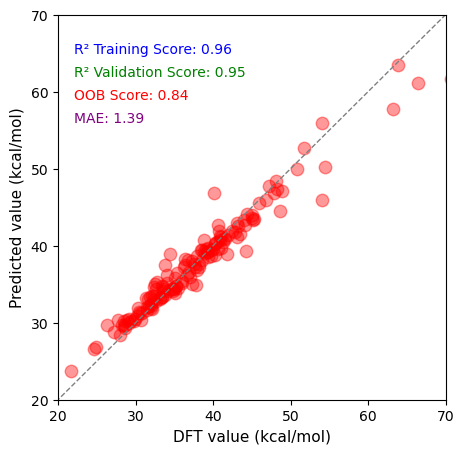

In [70]:
import random

y_pred = model.predict(X_testset)
r2_train = model.score(X_trainset, Y_trainset)
r2_val = model.score(X_testset, Y_testset)
oob_score = model.oob_score_
mae = mean_absolute_error(Y_testset, y_pred)


print("Plotting the sanity check results...\n")
fig, axes = plt.subplots(1, 1, figsize=(5,5))

y_pred = model.predict(X_testset)

x = np.linspace(15, 100, 90)
#plt.plot(Y_testset, y_pred, 'ro')
#plt.plot(Y_testset, y_pred, 'ro', markerfacecolor='none', markersize=5, markeredgewidth=2, alpha=0.5)
plt.plot(Y_testset, y_pred, 'ro',  markersize=9, alpha=0.4)
#ax1.scatter(Y_testset, y_pred, facecolor='none', s=20, color='chocolate')
plt.xlabel(r'DFT value (kcal/mol)', fontsize=11)
plt.ylabel(r'Predicted value (kcal/mol)', fontsize=11)
plt.plot(x,x, 'k-', linestyle='--', color='gray', linewidth=1)
plt.xlim(20, 70)
plt.ylim(20, 70)

plt.text(22, 65, f'R² Training Score: {r2_train:.2f}', fontsize=10, color='blue')
plt.text(22, 62, f'R² Validation Score: {r2_val:.2f}', fontsize=10, color='green')
plt.text(22, 59, f'OOB Score: {oob_score:.2f}', fontsize=10, color='red')
plt.text(22, 56, f'MAE: {mae:.2f}', fontsize=10, color='purple')  # اضافه کردن MAE


plt.savefig('333333.png', dpi=800)
plt.show()

In [71]:
mae = mean_absolute_error(Y_testset, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.3898585111111181


%GB

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
data_new = data_new.sample(frac=1)
rnd = random.randint(0, 999)
train_set, test_set = train_test_split(data_new, shuffle=True,
                                       random_state=rnd,
                                       test_size=0.15)

In [73]:
X_trainset = train_set.drop(columns=target_vars).to_numpy()
Y_trainset = train_set[target_vars]
X_testset = test_set.drop(columns=target_vars).to_numpy()
Y_testset = test_set[target_vars]

In [74]:
print('\033[1;35m The training set has {} rows and {} columns.'.format(train_set.shape[0], train_set.shape[1]))
print('\033[1;35m The testing set has {} rows and {} columns.'.format(test_set.shape[0], test_set.shape[1]))

 The training set has 850 rows and 14 columns.
 The testing set has 150 rows and 14 columns.


In [75]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_trainset, Y_trainset)

/usr/lib/python3/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor()

In [76]:
y_pred = model.predict(X_testset)
mae = mean_absolute_error(Y_testset, y_pred)
print("\033[1;35m R^2 Training Score: {:.2f}".format(r2_score(Y_trainset, model.predict(X_trainset))))
print("\033[1;35m R^2 Validation Score: {:.2f}".format(r2_score(Y_testset, y_pred)))
print("Mean Absolute Error:", mae)

 R^2 Training Score: 0.95
 R^2 Validation Score: 0.91
Mean Absolute Error: 2.309971252574108


Plotting the sanity check results...



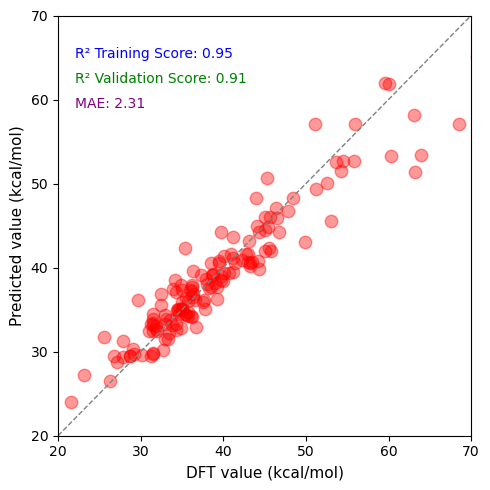

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# پیش‌بینی
y_pred = model.predict(X_testset)

# محاسبه معیارها
r2_train = model.score(X_trainset, Y_trainset)
r2_val = model.score(X_testset, Y_testset)
mae = mean_absolute_error(Y_testset, y_pred)

# رسم نمودار
print("Plotting the sanity check results...\n")
fig, ax = plt.subplots(figsize=(5, 5))

x = np.linspace(15, 100, 90)

# رسم نقاط پیش‌بینی‌شده در مقابل مقدار واقعی
ax.plot(Y_testset, y_pred, 'ro', markersize=9, alpha=0.4)

# خط ایده‌آل y=x
ax.plot(x, x, linestyle='--', color='gray', linewidth=1)

# برچسب‌ها
ax.set_xlabel(r'DFT value (kcal/mol)', fontsize=11)
ax.set_ylabel(r'Predicted value (kcal/mol)', fontsize=11)

# تنظیمات محدوده محورها
ax.set_xlim(20, 70)
ax.set_ylim(20, 70)

# نمایش مقادیر ارزیابی روی نمودار
ax.text(22, 65, f'R² Training Score: {r2_train:.2f}', fontsize=10, color='blue')
ax.text(22, 62, f'R² Validation Score: {r2_val:.2f}', fontsize=10, color='green')
# حذف OOB چون در GradientBoostingRegressor پشتیبانی نمی‌شود
ax.text(22, 59, f'MAE: {mae:.2f}', fontsize=10, color='purple')

# ذخیره و نمایش نمودار
plt.tight_layout()
plt.savefig('444444.png', dpi=800)
plt.show()


In [ ]:
#Iterations
num_iterations = 50
# متغیرها برای ذخیره مقادیر جهت محاسبه میانگین
train_scores = []
validation_scores = []
oob_scores = []

In [ ]:
for i in range(num_iterations):
    print(f"\nIteration {i + 1}/{num_iterations}")

    # شافل داده‌ها
    data_new = data_new.sample(frac=1, random_state=random.randint(0, 999))

    # تقسیم داده‌ها
    rnd = random.randint(0, 999)
    train_set, test_set = train_test_split(data_new, shuffle=True,
                                           random_state=rnd,
                                           test_size=0.15)

    X_trainset = train_set.drop(columns=target_vars).to_numpy()
    Y_trainset = train_set[target_vars]

    X_testset = test_set.drop(columns=target_vars).to_numpy()
    Y_testset = test_set[target_vars]

    model = RandomForestRegressor(oob_score=True, random_state=42)

    # تنظیم پارامترها
    parameters = {
        "n_estimators": [200, 400, 600],
        "min_samples_split": range(2, 5),
        "max_features": ["sqrt"],
        "min_samples_leaf": range(1, 4)
    }

    clf = GridSearchCV(model, parameters, cv=10, verbose=2, n_jobs=1, scoring='neg_mean_squared_error')
    clf.fit(X_trainset, Y_trainset.values.ravel())

    best_model = clf.best_estimator_

    # محاسبه و ذخیره امتیازها
    train_score = best_model.score(X_trainset, Y_trainset)
    validation_score = best_model.score(X_testset, Y_testset)
    oob_score = best_model.oob_score_

    train_scores.append(train_score)
    validation_scores.append(validation_score)
    oob_scores.append(oob_score)

    # نمایش نتایج این iteration
    print(f"\033[1;35m R^2 Training Score: {train_score:.2f}")
    print(f"\033[1;35m R^2 Validation Score: {validation_score:.2f}")
    print(f"\033[1;35m OOB Score: {oob_score:.2f}\n")

# محاسبه میانگین‌ها
mean_train_score = sum(train_scores) / num_iterations
mean_validation_score = sum(validation_scores) / num_iterations
mean_oob_score = sum(oob_scores) / num_iterations

# نمایش میانگین‌ها
print("\n\033[1;34m Final Averages:")
print(f"\033[1;35m Mean R^2 Training Score: {mean_train_score:.2f}")
print(f"\033[1;35m Mean R^2 Validation Score: {mean_validation_score:.2f}")
print(f"\033[1;35m Mean OOB Score: {mean_oob_score:.2f}")


Iteration 1/50
Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_es

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=600; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=2

In [ ]:

# نمایش میانگین‌ها
print("\n\033[1;34m Final Averages:")
print(f"\033[1;35m Mean R^2 Training Score: {mean_train_score:.2f}")
print(f"\033[1;35m Mean R^2 Validation Score: {mean_validation_score:.2f}")
print(f"\033[1;35m Mean OOB Score: {mean_oob_score:.2f}")

In [181]:
clf.best_params_
model = clf.best_estimator_

features = list(X.columns)
features

import matplotlib.pyplot as plt
import xgboost
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_trainset)
shap.summary_plot(shap_values,feature_names=features , show=False)

plt.savefig('ming.png', dpi=800)
plt.show()